#### KNN Regression  - For this Download the Sales Data of a Mega Mart  - Both Training and Test Data is seperated.
#### We will Use KNN to Predict the Sales of the Mega Mart based on Multiple independent variables
#### From Github -  <font color = 'red'>train_modified.csv  |  test_modified.csv   -  Top mentor Projects Datasets   

In [40]:
#### Loading the packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
url_train = 'https://raw.githubusercontent.com/DataScience75/Top_mentor_projects_Datasets/main/train_modified.csv'

In [4]:
df_train = pd.read_csv(url_train)
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,10,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,11,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,22,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [6]:
df_train.shape

(8523, 33)

In [7]:
#### Missing Values 
df_train.isnull().sum()

Item_Identifier           0
Item_Weight               0
Item_Visibility           0
Item_MRP                  0
Outlet_Identifier         0
Item_Outlet_Sales         0
Outlet_Years              0
Item_Fat_Content_0        0
Item_Fat_Content_1        0
Outlet_Location_Type_0    0
Outlet_Location_Type_1    0
Outlet_Location_Type_2    0
Outlet_Size_0             0
Outlet_Size_1             0
Outlet_Size_2             0
Outlet_Size_3             0
Outlet_Type_0             0
Outlet_Type_1             0
Outlet_Type_2             0
Outlet_Type_3             0
Item_Type_Combined_0      0
Item_Type_Combined_1      0
Item_Type_Combined_2      0
Outlet_0                  0
Outlet_1                  0
Outlet_2                  0
Outlet_3                  0
Outlet_4                  0
Outlet_5                  0
Outlet_6                  0
Outlet_7                  0
Outlet_8                  0
Outlet_9                  0
dtype: int64

In [8]:
df_train.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Item_Outlet_Sales         float64
Outlet_Years                int64
Item_Fat_Content_0          int64
Item_Fat_Content_1          int64
Outlet_Location_Type_0      int64
Outlet_Location_Type_1      int64
Outlet_Location_Type_2      int64
Outlet_Size_0               int64
Outlet_Size_1               int64
Outlet_Size_2               int64
Outlet_Size_3               int64
Outlet_Type_0               int64
Outlet_Type_1               int64
Outlet_Type_2               int64
Outlet_Type_3               int64
Item_Type_Combined_0        int64
Item_Type_Combined_1        int64
Item_Type_Combined_2        int64
Outlet_0                    int64
Outlet_1                    int64
Outlet_2                    int64
Outlet_3                    int64
Outlet_4                    int64
Outlet_5                    int64
Outlet_6      

In [11]:
df_train.Item_Identifier.nunique()

1559

In [13]:
df_train.Outlet_Identifier.nunique()

10

In [14]:
processed_data = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis = 1)
processed_data.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,3735.1380,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [16]:
#### Dividing the training Data into two parts - Train and test for model validations
train,test = train_test_split(processed_data, test_size = 0.3)

In [19]:
train.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
135,7.235,0.076856,116.0492,1969.4364,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1425,12.150,0.062640,36.6532,251.6724,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
X_train = train.drop('Item_Outlet_Sales',axis = 1)  ##### Independent 
y_train = train['Item_Outlet_Sales']  ### Dependent 

In [25]:
X_train.shape, y_train.shape

((5966, 30), (5966,))

In [24]:
X_test = test.drop('Item_Outlet_Sales',axis = 1)
y_test = test['Item_Outlet_Sales']

In [26]:
train.Item_Weight.skew()

0.07097263524786554

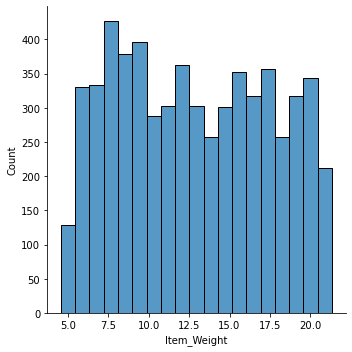

In [30]:
sns.displot(x = train['Item_Weight'])

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))  #### Standard Scaler, Robut Scaler

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.1595713 , 0.22560734, 0.35976136, ..., 0.        , 1.        ,
        0.        ],
       [0.45221792, 0.18184264, 0.02276416, ..., 0.        , 0.        ,
        0.        ],
       [0.73206311, 0.09175998, 0.65126334, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18844894, 0.14935025, 0.1935862 , ..., 1.        , 0.        ,
        0.        ],
       [0.2646621 , 0.19588836, 0.10174687, ..., 0.        , 0.        ,
        0.        ],
       [0.43137839, 0.06879773, 0.299991  , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Years','Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0','Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3','Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5','Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']
X_train = pd.DataFrame(X_train_scaled,columns = cols)
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.159571,0.225607,0.359761,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.452218,0.181843,0.022764,0.083333,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.732063,0.091760,0.651263,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.146770,0.238664,0.497386,0.916667,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.931527,0.350242,0.694916,0.208333,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.168800,0.241971,0.677691,0.916667,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5962,0.562370,0.080686,0.488495,0.291667,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5963,0.188449,0.149350,0.193586,0.291667,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5964,0.264662,0.195888,0.101747,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
a = X_test.columns
a

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Size_3', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3',
       'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [39]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled,columns = a)
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.226853,0.114411,0.669967,0.291667,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.193808,0.344260,0.901421,0.458333,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.970229,0.167229,0.307196,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.389699,0.165281,0.569145,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.732063,0.425630,0.492135,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,0.082465,0.098011,0.628283,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2553,0.138732,0.430511,0.326188,0.291667,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2554,0.880917,0.076310,0.143401,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2555,0.919619,0.173603,0.336973,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#### Data Modelling - KNN
How many k to choose  - Based on errors

In [41]:
rmse = []
for k in range(20):
    k = k+1
    model = KNeighborsRegressor(n_neighbors=k)  #### we have got k as 7 or 9 which is the best k
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse.append(error)
    print('RMSE value for k = ',k, 'is - ',error)

RMSE value for k =  1 is -  1537.9542723493073
RMSE value for k =  2 is -  1314.492511433225
RMSE value for k =  3 is -  1237.4037694797207
RMSE value for k =  4 is -  1197.7960710037491
RMSE value for k =  5 is -  1166.175555341635
RMSE value for k =  6 is -  1154.9985735977175
RMSE value for k =  7 is -  1138.3923803496546
RMSE value for k =  8 is -  1125.0675621321197
RMSE value for k =  9 is -  1120.2703616690467
RMSE value for k =  10 is -  1107.7299337195586
RMSE value for k =  11 is -  1106.5137698903623
RMSE value for k =  12 is -  1105.2066748778911
RMSE value for k =  13 is -  1102.0080286461684
RMSE value for k =  14 is -  1099.479271046539
RMSE value for k =  15 is -  1098.395080510949
RMSE value for k =  16 is -  1093.7447776980337
RMSE value for k =  17 is -  1094.9265102843992
RMSE value for k =  18 is -  1093.3465184355707
RMSE value for k =  19 is -  1092.50865139503
RMSE value for k =  20 is -  1091.8088255105395


<AxesSubplot:>

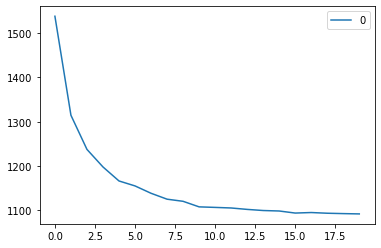

In [43]:
curve = pd.DataFrame(rmse)
curve.plot()

In [ ]:
#### to create the model with k as 7 and 9 and check the error in thev test_modified data also
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial REgression
4. KNN Regression